## Imports

---



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from math import sqrt
from scipy import linalg

In [3]:
#Define beta, gamma and f functions. They recieve an "x" value, and then output the value of the function

def beta(x):
  return (1+x**2)
def gamma(x):
  return x
def f(x):
  return (np.exp(-x))*(7-13*x+18*x**2-9*x**3+x**4)

#Function that recieves two vectors, computes the difference vector and outputs its norm infinity
def inf_norm(A,N):
  A.flatten()
  N.flatten()
  V = np.abs(A-N)
  return np.max(V)

### Solving for n=100 (Approximating the derivative of the boundary condition using a **backward** scheme)

---


In [ ]:
#For our PDE:

#PDE: (beta(x)*u_x)_x -gama(x)*u_x = f(x)
#Dirichlet Condition: U(0) = 1
#Neumann Condition: aU(1) + bU_x(1) = c. Since a = 2, b = -3 and U(x) is given, we can find c and re-write the Neumann condition as 2*U(1) - 3*U_x(1) = 0


def Backward_LU_dec(a,b,interior_points):

#Space discretization:
  x = np.linspace(0,1,num=interior_points+2) #n=100, (102 if we count with x=0 and x=1)
  delta_x = x[1]-x[0]
  U_analytical = np.exp(-x)*((x-1)**2)

  #Linear system of equatoins: MU=v

  #First: Build Matrix
  M = np.zeros((len(x)-2,len(x)-2))
  for i in range(1,len(x)-1):
    if i==1:

      M[0][0] = -(beta(x[i]+delta_x/2)+beta(x[i]-delta_x/2))/delta_x**2 - gamma(x[i])
      M[0][1] = beta(x[i]+delta_x/2)/delta_x**2

    elif i==len(x)-2:

      M[-1][-1] = -(beta(x[i]+delta_x/2)+beta(x[i]-delta_x/2))/delta_x**2 -gamma(x[i]) + (-beta(x[i]+delta_x/2)/delta_x**2)*((b/delta_x)/(a+b/delta_x))
      M[-1][-2] = beta(x[i]-delta_x/2)/delta_x**2

    else:
      
      M[i-1][i-2] = beta(x[i]-delta_x/2)/delta_x**2 
      M[i-1][i-1] = -(beta(x[i]+delta_x/2)+beta(x[i]-delta_x/2))/delta_x**2 - gamma(x[i])
      M[i-1][i] = beta(x[i]+delta_x/2)/delta_x**2 
      
  #Second: Build right-hand side V vector 
  v = np.zeros(len(x)-2)

  for i in range(1,len(x)-1):
    if i == 1:
      v[0] = f(x[i]) - 1 * beta(x[i]-delta_x/2)/delta_x**2 #(u(0) = 1)
    else:
      v[i-1] = f(x[i])

  #Thirds: Solve system using LU Decomposition (instead of inverting the matrix M...)
  U = linalg.solve(M, v)
  
  U = np.insert(U,obj = 0, values = 1)
  U = np.insert(U,obj = len(U), values = (b/(b+a*delta_x))*U[-1] )

  return U,U_analytical,x

In [ ]:
%%time
Backward_U_LU_100,Backward_U_analytical_100,Backward_x_100 = Backward_LU_dec(2,-3,100)

CPU times: user 5.43 ms, sys: 895 µs, total: 6.32 ms
Wall time: 4.71 ms


1.842456751320419e-05


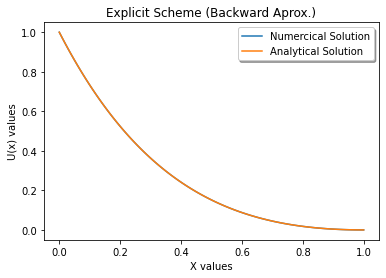

In [ ]:
plt.plot(Backward_x_100,Backward_U_LU_100)
plt.plot(Backward_x_100,Backward_U_analytical_100)     
plt.legend(('Numercical Solution', 'Analytical Solution'),
           loc='upper right', shadow=True)
plt.xlabel('X values')
plt.ylabel('U(x) values')
plt.title('Explicit Scheme (Backward Aprox.)')

print(inf_norm(Backward_U_LU_100,Backward_U_analytical_100))

### Solving for n=100 (Approximating the derivative of the boundary condition using a **central** scheme)

---


In [4]:
#For our PDE:

#PDE: (beta(x)*u_x)_x -gama(x)*u_x = f(x)
#Dirichlet Condition: U(0) = 1
#Neumann Condition: aU(1) + bU_x(1) = c. Since a = 2, b = -3 and U(x) is given, we can find c and re-write the Neumann condition as 2*U(1) - 3*U_x(1) = 0


def Central_LU_dec(a,b,interior_points):

#Space discretization:
  x = np.linspace(0,1,num=interior_points+2) #n=100, (102 if we count with x=0 and x=1)
  delta_x = x[1]-x[0]
  U_analytical = np.exp(-x)*((x-1)**2)

  #Linear system of equatoins: MU=v

  #First: Build Matrix
  M = np.zeros((len(x)-1,len(x)-1)) #5
  for i in range(len(M)):  #ATE 4 INCLUSIVE
    if i==0:

      M[0][0] = -(beta(x[i+1]+delta_x/2)+beta(x[i+1]-delta_x/2))/delta_x**2 - gamma(x[i+1])
      M[0][1] = beta(x[i+1]+delta_x/2)/delta_x**2

    elif i==len(x)-2:
      
      M[-1][-1] = -(beta(x[i+1]+delta_x/2)+beta(x[i+1]-delta_x/2))/delta_x**2 -gamma(x[i+1]) + (-2*a/(b*delta_x))*beta(x[i+1]+delta_x/2)
      M[-1][-2] = beta(x[i+1]-delta_x/2)/delta_x**2 + beta(x[i+1]+delta_x/2)/delta_x**2

    else:
      M[i][i-1] = beta(x[i+1]-delta_x/2)/delta_x**2 
      M[i][i] = -(beta(x[i+1]+delta_x/2)+beta(x[i+1]-delta_x/2))/delta_x**2 - gamma(x[i+1])
      M[i][i+1] = beta(x[i+1]+delta_x/2)/delta_x**2 
      
  
  #Second: Build right-hand side V vector 
  v = np.zeros(len(x)-1)

  for i in range(len(v)):
    if i == 0:
      v[0] = f((i+1)*delta_x) - 1 * beta((i+1)*delta_x-delta_x/2)/delta_x**2 
    else:
      v[i] = f((i+1)*delta_x)

  #Thirds: Solve system using LU Decomposition (instead of inverting the matrix M...)
  U = linalg.solve(M, v)
  U = np.insert(U,obj = 0, values = 1)

  return U,U_analytical,x

In [ ]:
%%time
Central_U_LU_100,Central_U_analytical_100,Central_x_100 = Central_LU_dec(2,-3,100)

CPU times: user 5.53 ms, sys: 1.23 ms, total: 6.77 ms
Wall time: 7.06 ms


0.0004740350280061713


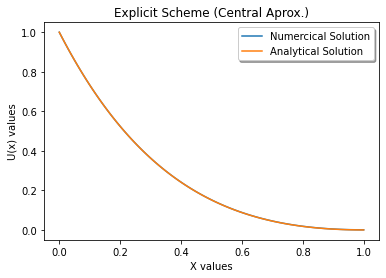

In [ ]:
plt.plot(Central_x_100,Central_U_LU_100)
plt.plot(Central_x_100,Central_U_analytical_100)     
plt.legend(('Numercical Solution', 'Analytical Solution'),
           loc='upper right', shadow=True)
plt.xlabel('X values')
plt.ylabel('U(x) values')
plt.title('Explicit Scheme (Central Aprox.)')

print(inf_norm(Central_U_LU_100,Central_U_analytical_100))

### The other alternative is solving by iteration (instead of using linalg.solve from numpy)

---



In [ ]:
def Iteration(a,b,interior_points,dst):

  #Space discretization:
  x = np.linspace(0,1,interior_points+2) #n=100, (102 if we count with x=0 and x=1)
  delta_x = x[1]-x[0]
  U_analytical = np.exp(-x)*((x-1)**2)

  U = np.zeros(len(x))
  U[0]=1
  
  temp=np.array([e for e in U])+999

  while dst >=1e-5:
    
    for i in range(1,len(U)-1):
      U[i] = ( -1 / ( beta(x[i]+delta_x/2)/delta_x**2+beta(x[i]-delta_x/2)/delta_x**2+gamma(x[i]) ))*(f(x[i]) - U[i+1]*(beta(x[i]+delta_x/2)/delta_x**2) - U[i-1]*(beta(x[i]-delta_x/2)/delta_x**2))
    
    U[-2] = (f(x[-2]) - (beta(x[-2]-delta_x/2)/delta_x**2)*U[-3] )  / ( (b/(b+a*delta_x))*beta(x[-2]+delta_x/2)/delta_x**2 - beta(x[-2]+delta_x/2)/delta_x**2 - beta(x[-2]-delta_x/2)/delta_x**2 - gamma(x[-2]))
    U[-1] = (b/(b+a*delta_x))*U[-2]
    
    dst = np.linalg.norm(U - temp)
    temp=np.array([e for e in U])

  return U,U_analytical,x


In [ ]:
%%time
U_it,U_it_analytical,x=Iteration(2,-3,100,1e-4)

CPU times: user 38.2 s, sys: 310 ms, total: 38.6 s
Wall time: 38.5 s


0.00916233551099493


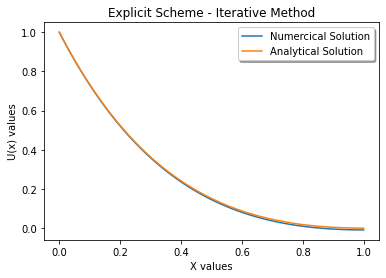

In [ ]:
plt.plot(x,U_it)
plt.plot(x,U_it_analytical)     
plt.legend(('Numercical Solution', 'Analytical Solution'),
           loc='upper right', shadow=True)
plt.xlabel('X values')
plt.ylabel('U(x) values')
plt.title('Explicit Scheme - Iterative Method')
print(inf_norm(U_it,U_it_analytical))

**Grid Refinment Analysis**
---

1st for the one with Backward scheme for the derivative

---



In [ ]:
#Grid refinement analysis:
# n=25
# n=50
# n=100
# n=200
# n=400

Backward_U_LU_25, Backward_U_analytical_25,a = Backward_LU_dec(2,-3,25)
Backward_norm_infinity_25 = np.max(np.abs(Backward_U_LU_25-Backward_U_analytical_25))

Backward_U_LU_50, Backward_U_analytical_50,a = Backward_LU_dec(2,-3,50)
Backward_norm_infinity_50 = np.max(np.abs(Backward_U_LU_50-Backward_U_analytical_50))

Backward_U_LU_100, Backward_U_analytical_100,a = Backward_LU_dec(2,-3,100)
Backward_norm_infinity_100 = np.max(np.abs(Backward_U_LU_100-Backward_U_analytical_100))

Backward_U_LU_200, Backward_U_analytical_200,a = Backward_LU_dec(2,-3,200)
Backward_norm_infinity_200 = np.max(np.abs(Backward_U_LU_200-Backward_U_analytical_200))

Backward_U_LU_400, Backward_U_analytical_400,a = Backward_LU_dec(2,-3,400)
Backward_norm_infinity_400 = np.max(np.abs(Backward_U_LU_400-Backward_U_analytical_400))

print("Errors:",Backward_norm_infinity_25,Backward_norm_infinity_50,Backward_norm_infinity_100,Backward_norm_infinity_200,Backward_norm_infinity_400)
print("Ratio between Errors:",Backward_norm_infinity_25/Backward_norm_infinity_50,Backward_norm_infinity_50/Backward_norm_infinity_100,Backward_norm_infinity_100/Backward_norm_infinity_200,Backward_norm_infinity_200/Backward_norm_infinity_400)

#The error drop by 4 (roughly)


Errors: 0.00029583447569672905 7.380238290102416e-05 1.842456751320419e-05 4.60246298952428e-06 1.1501286859168293e-06
Ratio between Errors: 4.008467803722144 4.005650762121433 4.003197321768924 4.00169393727921


Now for the one with Central scheme for the derivative

---

In [5]:
#Grid refinement analysis:
# n=25
# n=50
# n=100
# n=200
# n=400

Central_U_LU_25, Central_U_analytical_25,a = Central_LU_dec(2,-3,25)
Central_norm_infinity_25 = np.max(np.abs(Central_U_LU_25-Central_U_analytical_25))

Central_U_LU_50, Central_U_analytical_50,b = Central_LU_dec(2,-3,50)
Central_norm_infinity_50 = np.max(np.abs(Central_U_LU_50-Central_U_analytical_50))

Central_U_LU_100, Central_U_analytical_100,b = Central_LU_dec(2,-3,100)
Central_norm_infinity_100 = np.max(np.abs(Central_U_LU_100-Central_U_analytical_100))

Central_U_LU_200, Central_U_analytical_200,b = Central_LU_dec(2,-3,200)
Central_norm_infinity_200 = np.max(np.abs(Central_U_LU_200-Central_U_analytical_200))

Central_U_LU_400, Central_U_analytical_400,b = Central_LU_dec(2,-3,400)
Central_norm_infinity_400 = np.max(np.abs(Central_U_LU_400-Central_U_analytical_400))

print("Errors:",Central_norm_infinity_25,Central_norm_infinity_50,Central_norm_infinity_100,Central_norm_infinity_200,Central_norm_infinity_400)
print("Ratio of Erros:",Central_norm_infinity_25/Central_norm_infinity_50,Central_norm_infinity_50/Central_norm_infinity_100,Central_norm_infinity_100/Central_norm_infinity_200,Central_norm_infinity_200/Central_norm_infinity_400)

#The error drop by 4 (roughly)


Errors: 0.007146473700439976 0.0018587749893370245 0.0004740350280061713 0.00011969694661003519 3.0074055660885095e-05
Ratio of Erros: 3.844722325959923 3.921176452202654 3.9602934028931114 3.9800733216609485


**Q:** a = 0 or b = 0

---


In [7]:
# Central_U_b, Central_U_analytical_b, xb = Central_LU_dec(2,0,100) #We will obtain an error
Central_U_a, Central_U_analytical_a, xa = Central_LU_dec(0,-3,100)

0.0004064565344635864
6.75784935425849e-05
0.0004740350280061713


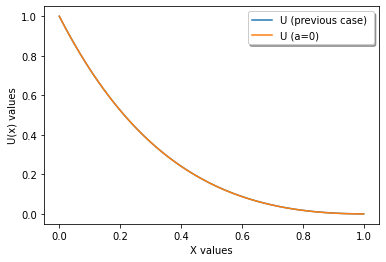

In [11]:
plt.plot(Central_x_100,Central_U_LU_100)
plt.plot(xa,Central_U_a)

plt.legend(('U (previous case) ', 'U (a=0)'),
           loc='upper right', shadow=True)
plt.xlabel('X values')
plt.ylabel('U(x) values')

#For the case where a=0 and b=-3, the solution is the same as the one obtained before.
print(inf_norm(Central_U_LU_100,Central_U_a))
print(inf_norm(Central_U_analytical_a,Central_U_a))  #The error is actually lower for a=0 (6.75784935425849e-05)
print(inf_norm(Central_U_analytical_a,Central_U_LU_100))  #Here the error is larger (0.0004740350280061713)